In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sns.load_dataset("iris")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.species.replace("setosa",0,inplace=True)
data.species.replace("versicolor",1,inplace=True)
data.species.replace("virginica",2,inplace=True)

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
data.species.astype("category", inplace=True)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]

In [7]:
X = data.iloc[:,0:2].values

In [8]:
X.shape

(150, 2)

In [9]:
y = data.iloc[:,-1].values

In [10]:
y.shape

(150,)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=9)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [17]:
accuracy = []

for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

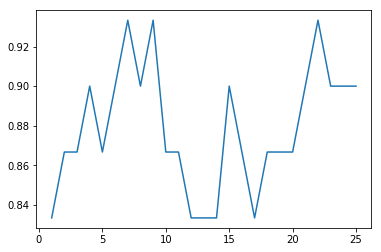

In [18]:
plt.plot(range(1,26),accuracy)

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [20]:
accuracy_score(y_test,knn.predict(X_test))

0.9333333333333333

In [21]:
def species():
    length = float(input("Enter the sepal length : "))
    width = float(input("Enter the sepal width : "))
    
    X_new = np.array([[length],[width]]).reshape(1,2)
    X_new = scaler.transform(X_new)
    
    if knn.predict(X_new)[0] == 0:
        return "setosa"
    elif knn.predict(X_new)[0] == 1:
        return "versicolor"
    else:
        return "virginica"

In [22]:
species()

Enter the sepal length : 6
Enter the sepal width : 3


'versicolor'

In [23]:
a = np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b = np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)

In [24]:
a.shape

(644,)

In [25]:
b.shape

(695,)

In [26]:
XX,YY=np.meshgrid(a,b)

In [27]:
XX.shape

(695, 644)

In [28]:
YY.shape

(695, 644)

In [29]:
input_array = np.array([XX.ravel(),YY.ravel()]).T

labels = knn.predict(input_array)

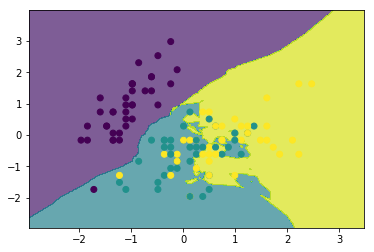

In [30]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.7)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)